## money flow

In [1]:
import talib
import pandas as pd
import tushare as tu
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_ldkg = tu.get_hist_data('600606',start='2014-03-18')
df_ldkg.head()
ldkg=df_ldkg.loc[:,['open','high','close','low','volume']]
ldkg.tail(20)

,open,high,close,low,volume
date,,,,,
2014-04-15,8.76,9.26,9.04,8.76,362347.25
2014-04-14,8.73,8.92,8.84,8.56,225754.66
2014-04-11,8.92,8.93,8.74,8.58,268470.88
2014-04-10,8.83,9.26,9.04,8.74,491796.56
2014-04-09,8.72,8.87,8.78,8.68,236175.06
2014-04-08,8.77,8.93,8.79,8.66,258692.20
2014-04-04,8.63,8.85,8.74,8.52,303419.38
2014-04-03,9.00,9.00,8.74,8.39,504909.44
2014-04-02,9.00,9.54,9.18,8.91,512327.38


In [3]:
ldkg.loc[:,'midpoint'] = (ldkg['high']+ldkg['low'])/2
ldkg.loc[:,'ifAccu'] = ldkg['close'] > ldkg['midpoint']
ldkg.tail(20)

,open,high,close,low,volume,midpoint,ifAccu
date,,,,,,,
2014-04-15,8.76,9.26,9.04,8.76,362347.25,9.010,True
2014-04-14,8.73,8.92,8.84,8.56,225754.66,8.740,True
2014-04-11,8.92,8.93,8.74,8.58,268470.88,8.755,False
2014-04-10,8.83,9.26,9.04,8.74,491796.56,9.000,True
2014-04-09,8.72,8.87,8.78,8.68,236175.06,8.775,True
2014-04-08,8.77,8.93,8.79,8.66,258692.20,8.795,False
2014-04-04,8.63,8.85,8.74,8.52,303419.38,8.685,True
2014-04-03,9.00,9.00,8.74,8.39,504909.44,8.695,True
2014-04-02,9.00,9.54,9.18,8.91,512327.38,9.225,False


In [4]:
ldkg=ldkg.reindex(index=ldkg.index[::-1])#reverse the order
ldkg.head(20)

,open,high,close,low,volume,midpoint,ifAccu
date,,,,,,,
2014-03-18,5.75,5.75,5.75,5.75,3622.50,5.750,False
2014-03-19,6.33,6.33,6.33,6.33,3871.65,6.330,False
2014-03-20,6.96,6.96,6.96,6.96,6234.33,6.960,False
2014-03-21,7.66,7.66,7.66,7.66,26217.68,7.660,False
2014-03-24,8.43,8.43,8.43,8.43,22302.12,8.430,False
2014-03-25,9.27,9.27,9.27,9.27,16393.56,9.270,False
2014-03-26,10.20,10.20,10.20,10.20,31485.11,10.200,False
2014-03-27,11.22,11.22,10.99,10.48,1254318.38,10.850,True
2014-03-28,10.50,10.58,9.89,9.89,606974.19,10.235,False


In [6]:
ldkg.loc[:,'CLV'] = (ldkg['close'] - ldkg['low'] - 
               ldkg['high'] + ldkg['close'])/(ldkg['high']-ldkg['low'])
ldkg.loc[:,'Adline'] = ldkg['CLV'] * ldkg['volume']#daily ADLine
ldkg.head(20)

,open,high,close,low,volume,midpoint,ifAccu,CLV,ADLine
date,,,,,,,,,
2014-03-18,5.75,5.75,5.75,5.75,3622.50,5.750,False,NaN,NaN
2014-03-19,6.33,6.33,6.33,6.33,3871.65,6.330,False,NaN,NaN
2014-03-20,6.96,6.96,6.96,6.96,6234.33,6.960,False,NaN,NaN
2014-03-21,7.66,7.66,7.66,7.66,26217.68,7.660,False,NaN,NaN
2014-03-24,8.43,8.43,8.43,8.43,22302.12,8.430,False,NaN,NaN
2014-03-25,9.27,9.27,9.27,9.27,16393.56,9.270,False,NaN,NaN
2014-03-26,10.20,10.20,10.20,10.20,31485.11,10.200,False,NaN,NaN
2014-03-27,11.22,11.22,10.99,10.48,1254318.38,10.850,True,0.378378,474606.954595
2014-03-28,10.50,10.58,9.89,9.89,606974.19,10.235,False,-1.000000,-606974.190000


In [23]:
reload (moneyflow)
ldkg=df_ldkg.loc[:,['open','high','close','low','volume']]

In [24]:
ldkg=moneyflow.adline(ldkg,5)

In [25]:
ldkg.head()

,Close,High,Low,Open,Volume,Clv,Adline
2014-03-18,8.43,8.43,5.75,5.75,62248.28,1.000000,6.224828e+04
2014-03-25,8.90,11.22,8.90,9.27,2462048.99,-1.000000,-2.462049e+06
2014-04-01,8.79,9.54,8.39,8.81,1975642.99,-0.304348,-6.012826e+05
2014-04-09,9.04,9.26,8.56,8.72,1584544.41,0.371429,5.885451e+05
2014-04-16,8.72,9.24,8.38,8.97,987492.72,-0.209302,-2.066845e+05


## visualization

In [60]:
import ohlcvPlot

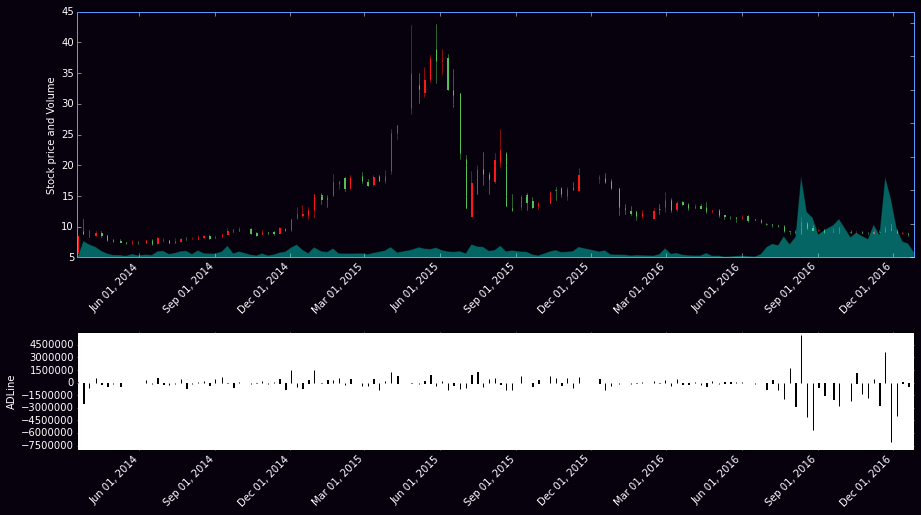

In [59]:
ohlcvPlot.pandas_candlestick_ohlcv(ldkg,adline='Adline')